In [1]:
import numpy as np
import matplotlib.pyplot as plt
from energy_spectrum import calculate_scalar_energy_spectrum, calculate_energy_spectrum

### 1D

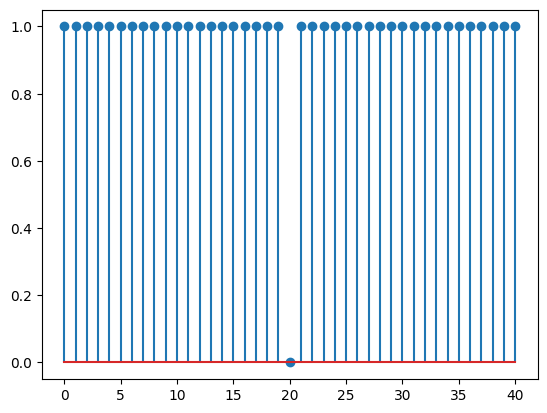

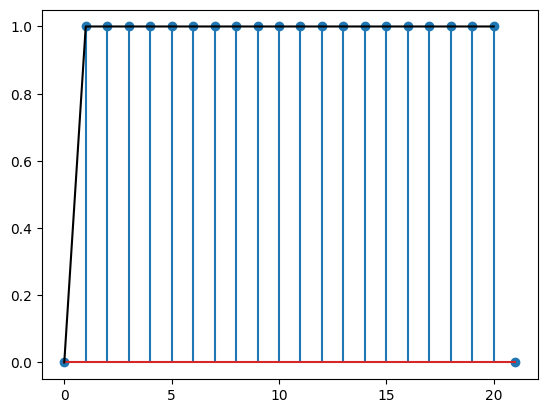

In [2]:
N = 20
EK_U = [1] * N
EK_U = np.array(EK_U[::-1] + [0] + EK_U)
plt.stem(EK_U)

k, Ek = calculate_scalar_energy_spectrum(
    EK_U=EK_U, debug=False
)
plt.figure()
plt.stem(Ek)
plt.plot(EK_U[(len(EK_U)-1)//2:], 'k')

21


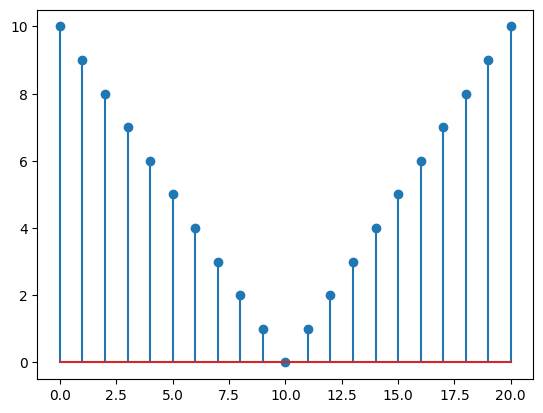

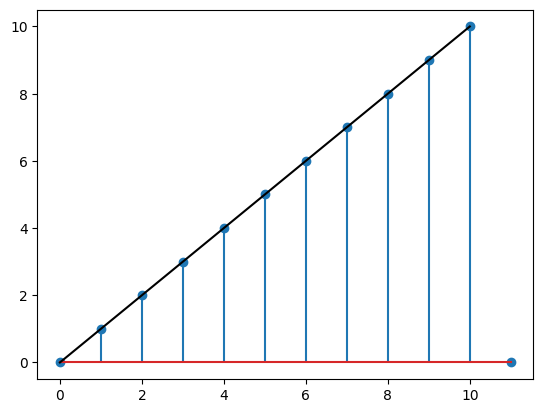

In [3]:
N = 10
EK_U = list(np.arange(N)+1)
EK_U = EK_U[::-1] + [0] + EK_U
EK_U = np.array(EK_U)
print(len(EK_U))
plt.stem(EK_U)

k, Ek = calculate_scalar_energy_spectrum(EK_U)
plt.figure()
plt.stem(Ek)
plt.plot(EK_U[(len(EK_U)-1)//2:], 'k')

### 2D

(-0.5, 4.5, 4.5, -0.5)

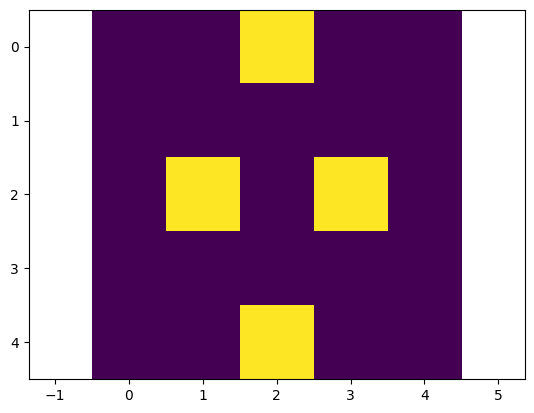

In [4]:
sr = 5
x = y = np.arange(0, 1., 1. / sr)
X, Y = np.meshgrid(x, y)
u = np.sin(2 * np.pi * X) + np.sin(2* np.pi * 2 * Y)
U0 = 0.5

# When
EK_U, EK_V, EK_W, u_spectrum, v_spectrum, w_spectrum =\
    calculate_energy_spectrum(
        u=u, v=u, w=None, U0=U0, debug=True
    )
plt.imshow(EK_U)
plt.axis('equal')

In [5]:
k, Ek = calculate_scalar_energy_spectrum(EK_U, EK_U)
print(len(k))

5


<StemContainer object of 3 artists>

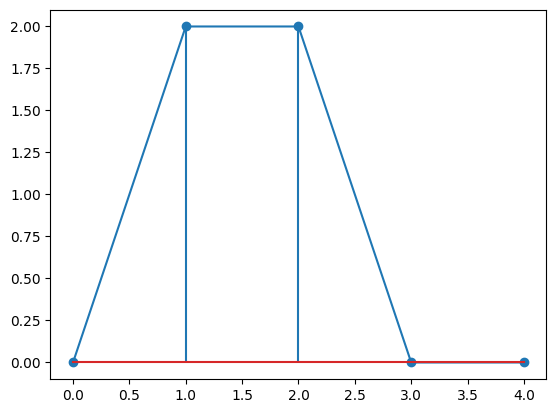

In [6]:
plt.plot(Ek)
plt.stem(Ek)

In [7]:
def mirror_data(q1):
    q2 = np.fliplr(q1)
    q3 = np.flipud(q1)
    q4 = np.flipud(q2)
    Q = np.vstack((np.hstack((q1, q2)), np.hstack((q3, q4))))
    return Q

(-0.5, 2.5, 2.5, -0.5)

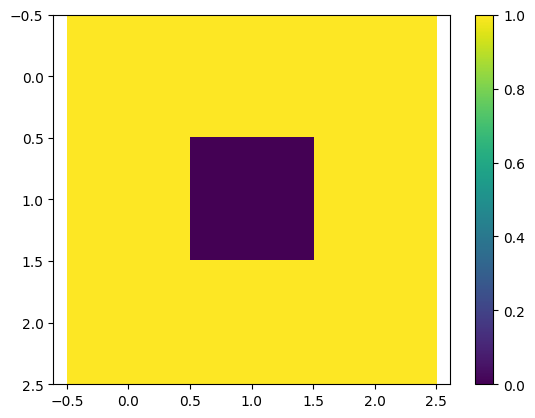

In [8]:
# Create data for first quadrant
EK_U = np.array([
    [1, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
plt.imshow(EK_U)
plt.colorbar()
plt.axis('equal')

In [9]:
k, Ek, EK_U_sphere, EK_V_sphere, EK_W_sphere =\
    calculate_scalar_energy_spectrum(EK_U, EK_U, debug=True)
print(len(k))

4


<StemContainer object of 3 artists>

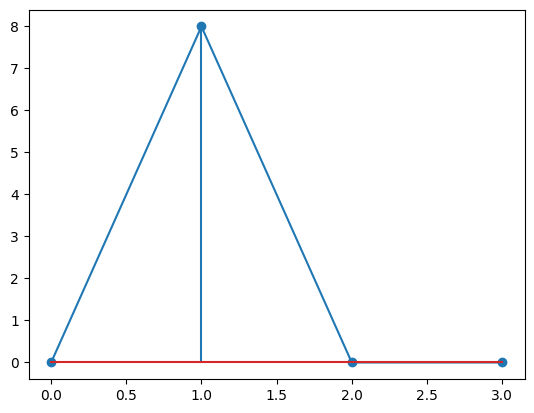

In [10]:
plt.plot(k, Ek)
plt.stem(EK_U_sphere)

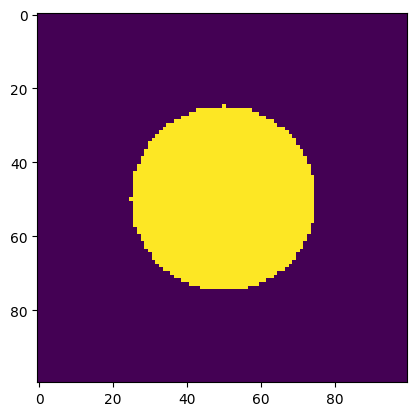

In [11]:
# Create meshgrid of 10X10 points
x = y = np.arange(-1, 1., 1. / 50)
X, Y = np.meshgrid(x, y)

# Create a circle
r = 0.5
u = np.sqrt((X)**2 + (Y )**2) < r
plt.imshow(u)

In [12]:
k, Ek, EK_U_sphere, EK_V_sphere, EK_W_sphere =\
    calculate_scalar_energy_spectrum(u, u, debug=True)

<StemContainer object of 3 artists>

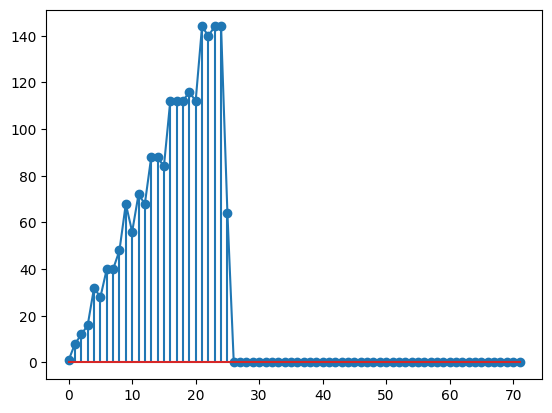

In [13]:
plt.plot(k, Ek)
plt.stem(EK_U_sphere)

### 3D

In [14]:
EK_U = np.array([
    [
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]
    ],
    [
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
    ],
    [
        [1, 0, 1],
        [0, 1, 0],
        [1, 0, 1]
    ]
])
k, Ek, EK_U_sphere, EK_V_sphere, EK_W_sphere =\
    calculate_scalar_energy_spectrum(EK_U, EK_U, EK_U, debug=True)
print(len(k))

4


array([ 1., 14.,  4.,  0.])

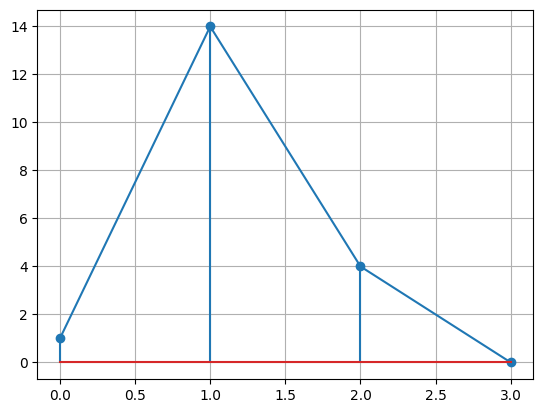

In [15]:
plt.plot(EK_U_sphere)
plt.stem(EK_U_sphere)
plt.grid()
np.round(EK_U_sphere)

### Scipy vs Numpy FFTm

In [16]:
from numpy.fft import fftn as fftn_numpy
from scipy.fft import fftn as fftn_scipy
import numpy as np
import matplotlib.pyplot as plt
import time

In [17]:
# Sampling rate
sr = 5000

# Time vector
t = np.arange(0, 1., 1. / sr)

# Signal
f = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
a = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
x = np.zeros(len(t))
for i in range(len(f)):
    x += a[i] * np.sin(2 * np.pi * f[i] * t)

# FFT - Numpy
X_numpy = fftn_numpy(x)
X_numpy = np.abs(X_numpy)

# FFT - Scipy
X_scipy = fftn_scipy(x)
X_scipy = np.abs(X_scipy)

(0.653214539946479,
 7652.9221171494255,
 6.817185578769509e-19,
 8.612145751007555e-13)

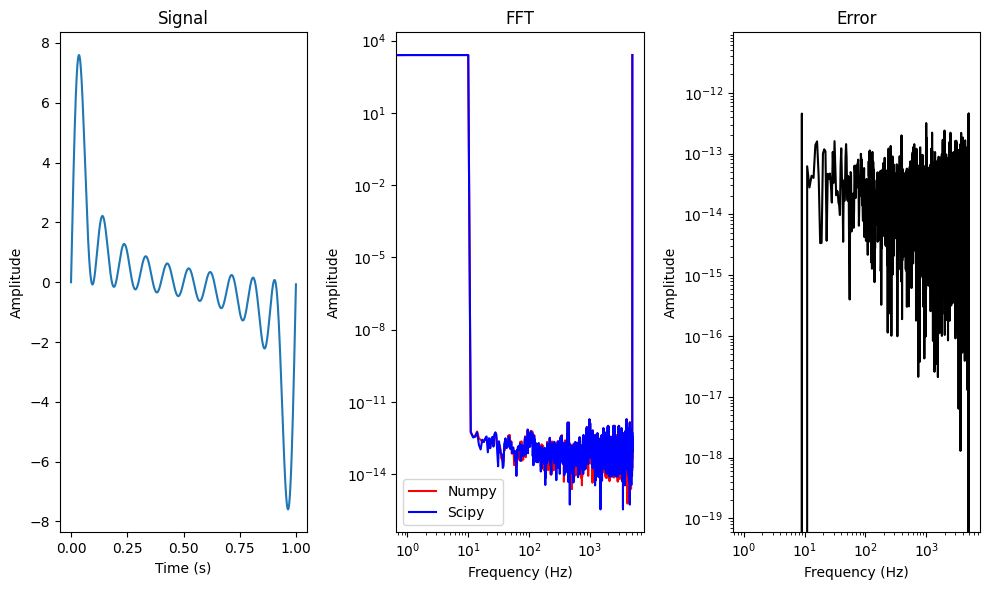

In [18]:
# Plot
plt.figure(figsize=(10, 6))
plt.subplot(131)
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal')
plt.subplot(132)
plt.loglog(X_numpy, 'r', label='Numpy')
plt.loglog(X_scipy, 'b', label='Scipy')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT')
plt.legend()
plt.subplot(133)
# Plot error
plt.loglog(np.abs(X_numpy - X_scipy), 'k')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Error')

plt.tight_layout()
plt.axis('equal')

In [19]:
# Plot Computation Time of numpy and scipy fftn
N_run = 10
t_numpy = []
t_scipy = []
N_array = np.arange(10, 15) #np.arange(10, 25)
N_array = 2**N_array
for n, N in enumerate(N_array):
    if n % 5 == 0:
        print(n)
    x0 = np.random.rand(N)
    t0 = time.time()
    for i in range(N_run):
        X_numpy = fftn_numpy(x0)
    t1 = time.time()
    t_numpy.append((t1 - t0) / 10)

    t0 = time.time()
    for i in range(N_run):
        X_scipy = fftn_scipy(x0, workers=64)
    t1 = time.time()
    t_scipy.append((t1 - t0) / 10)

0


C:\Users\prajw\AppData\Local\Temp\ipykernel_10604\2772034879.py:12: RuntimeWarning: divide by zero encountered in divide
  speedup = np.array(t_scipy) / np.array(t_numpy)
C:\Users\prajw\AppData\Local\Temp\ipykernel_10604\2772034879.py:12: RuntimeWarning: invalid value encountered in divide
  speedup = np.array(t_scipy) / np.array(t_numpy)


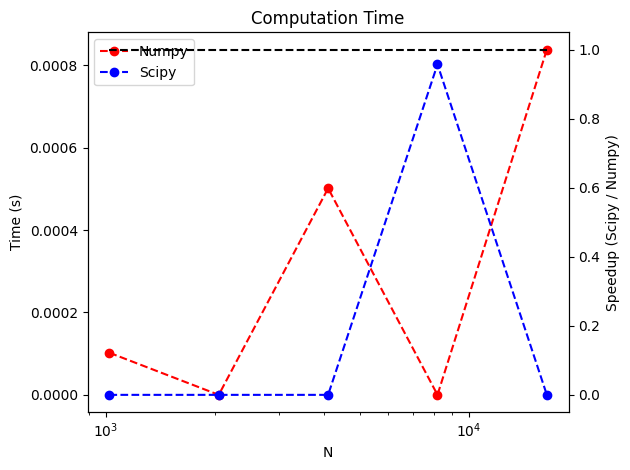

In [20]:
# Plot log-log plots
fig, ax = plt.subplots()
ax.semilogx(N_array, t_numpy, 'ro--', label='Numpy')
ax.semilogx(N_array, t_scipy, 'bo--', label='Scipy')
ax.set_xlabel('N')
ax.set_ylabel('Time (s)')
ax.set_title('Computation Time')
ax.legend()
plt.tight_layout()

# Plot speedup in secondary y-axis
speedup = np.array(t_scipy) / np.array(t_numpy)
speedup = np.abs(speedup)
ax2 = ax.twinx()
ax2.plot(N_array, speedup, 'k')
ax2.set_ylabel('Speedup (Scipy / Numpy)')
ax2.hlines(1, N_array[0], N_array[-1], 'k', '--')
plt.tight_layout()

In [21]:
# %timeit fftn_scipy(x, workers=None)

In [22]:
# %timeit fftn_scipy(x, workers=-1)

In [23]:
# %timeit fftn_scipy(x, workers=1)

In [24]:
# %timeit fftn_scipy(x, workers=64)

### Benchmark Problem

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from energy_spectrum import calculate_energy_spectrum, calculate_scalar_energy_spectrum

In [26]:
# Create meshgrid
N = 50
x = y = np.arange(0, 1., 1. / N)
X, Y = np.meshgrid(x, y)

# Sine wave
twopi = 2 * np.pi
u = - np.cos(twopi * X) * np.sin(twopi * Y)
v = np.sin(twopi * X) * np.cos(twopi * Y)

EK_U, EK_V, EK_W = calculate_energy_spectrum(u, v, debug=False)
k, Ek, = calculate_scalar_energy_spectrum(EK_U, EK_V, EK_W=None, debug=False)

Text(0.5, 1.0, 'v')

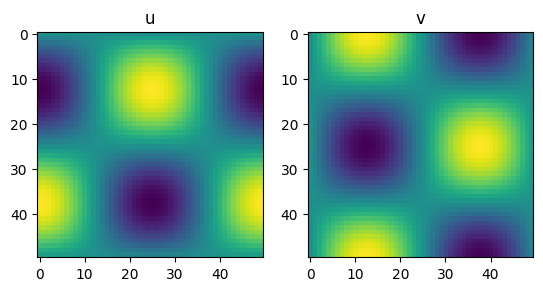

In [27]:
plt.subplot(121)
plt.imshow(u)
plt.title('u')
plt.subplot(122)
plt.imshow(v)
plt.title('v')

Text(0.5, 1.0, 'Ek')

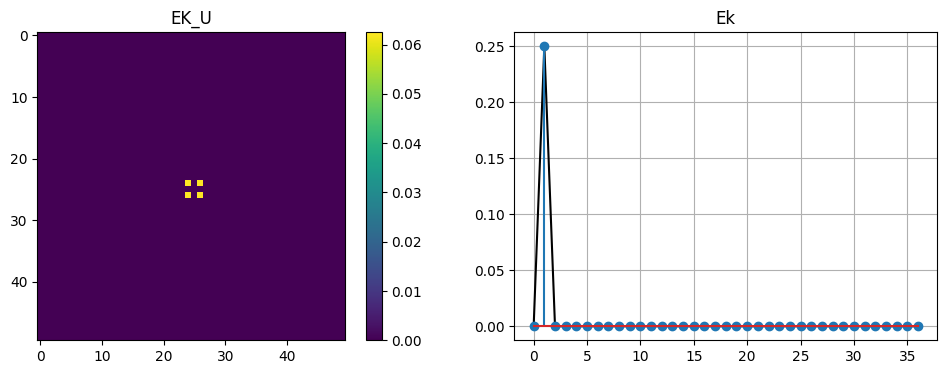

In [28]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(EK_U)
plt.colorbar()
plt.title('EK_U')
plt.subplot(122)
plt.plot(k, Ek, 'k')
plt.stem(k, Ek)
plt.grid()
plt.title('Ek')

In [29]:
def test(perturb=False):
    if not perturb:
        data = np.load('outputs\\tgv_re_100_nx_50_uniform\\energy_spectrum.npz')
    else:
        data = np.load('outputs\\tgv_re_100_nx_50\\energy_spectrum.npz')

    # Kernel radius
    h = data['h']
    k_h = 1. / h

    # Create meshgrid
    N = data["Ni"]
    x = y = np.arange(0, 1., 1. / N)
    X, Y = np.meshgrid(x, y)

    # Initial Sine wave
    twopi = 2 * np.pi
    u = - np.cos(twopi * X) * np.sin(twopi * Y)
    v = np.sin(twopi * X) * np.cos(twopi * Y)
    EK_U, EK_V, EK_W = calculate_energy_spectrum(u, v, debug=False)
    k, Ek, = calculate_scalar_energy_spectrum(EK_U, EK_V, EK_W=None, debug=False)

    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.loglog(k, Ek, 'k-', label='expected')
    plt.loglog(data['k0'], data['Ek0'], 'b-', label='TGV0')
    plt.vlines(k_h, 1e-46, 1e-1, 'g', '--', label='h')
    plt.legend()
    plt.xlabel('k')
    plt.ylabel('Ek')
    plt.title(f'N = {N}, Perturb = {perturb}')
    plt.grid()

    # Final Sine wave
    b = -2.*twopi/100.
    fac = np.exp(b*data["tf"])
    u = - np.cos(twopi * X) * np.sin(twopi * Y) * fac
    v = np.sin(twopi * X) * np.cos(twopi * Y) * fac
    EK_U, EK_V, EK_W = calculate_energy_spectrum(u, v, debug=False)
    k, Ek, = calculate_scalar_energy_spectrum(EK_U, EK_V, EK_W=None, debug=False)

    plt.subplot(122)
    plt.loglog(k, Ek, 'k-', label='expected')
    plt.loglog(data['kf'], data['Ekf'], 'b-', label='TGVf')
    plt.vlines(k_h, 1e-46, 1e-1, 'g', '--', label='h')
    plt.legend()
    plt.xlabel('k')
    plt.ylabel('Ek')
    plt.title(f'N = {N}, Perturb = {perturb}')
    plt.grid()

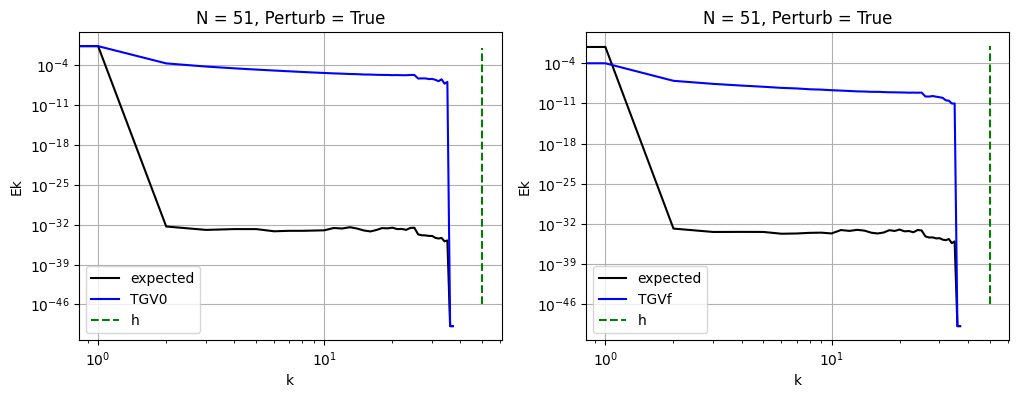

In [30]:
test(perturb=True)

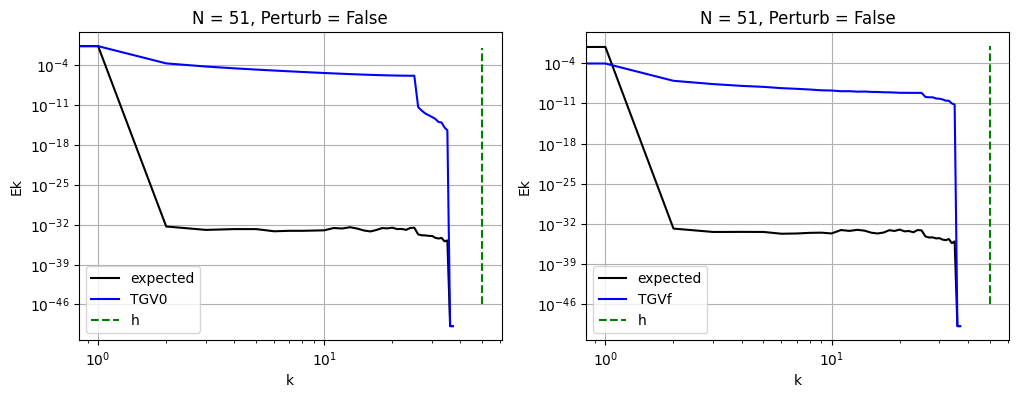

In [31]:
test()

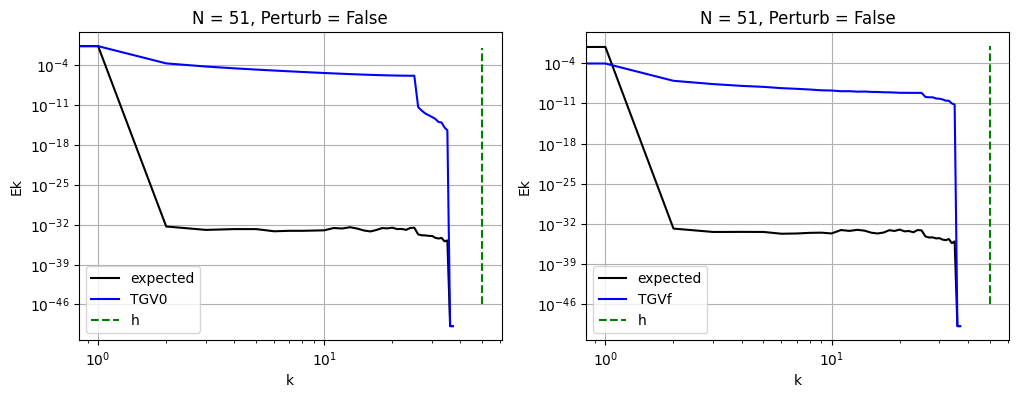

In [32]:
test()

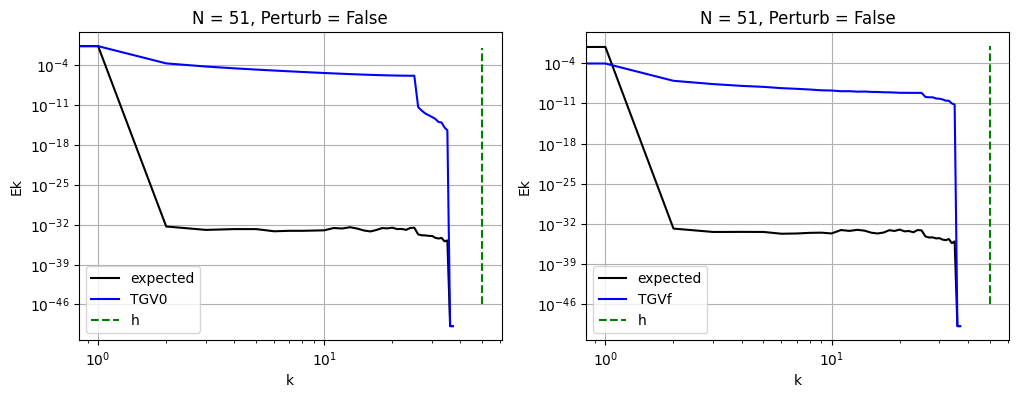

In [33]:
test()

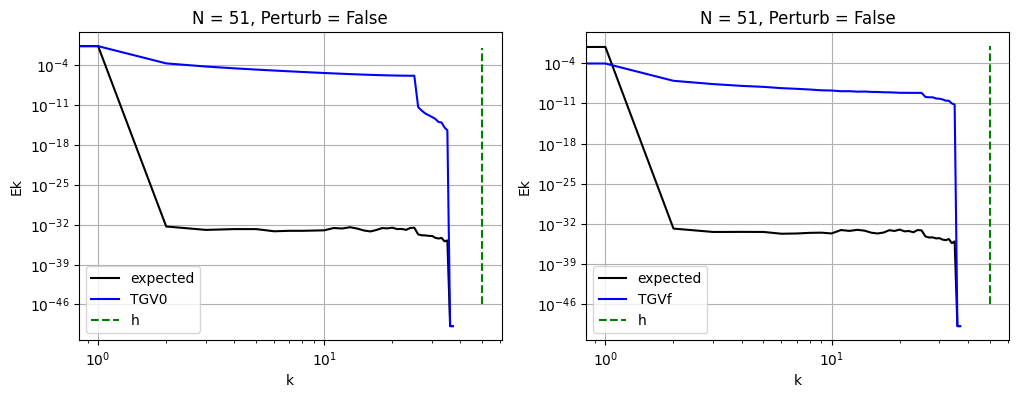

In [34]:
test()

### Read output files

In [35]:
from pysph.solver.utils import load

In [36]:
data = load("outputs\\tgv_re_100_nx_50\\taylor_green_00100.npz")

In [37]:
for i in data['arrays'].values():
    print(i.name)

fluid


In [38]:
data['arrays']['fluid'].properties.keys()

dict_keys(['tag', 'pid', 'gid', 'x', 'y', 'm', 'h', 'u', 'v', 'rho', 'p', 'au', 'w', 'z', 'aw', 'av', 'x0', 'w0', 'v0', 'p0', 'nnbr', 'ap', 'avhat', 'z0', 'y0', 'V', 'uhat', 'pavg', 'auhat', 'what', 'vhat', 'awhat', 'u0'])